<a href="https://colab.research.google.com/github/pranavi2013/AIML_2024/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abisheksudarshan/customer-segmentation")

print("Path to dataset files:", path)

100%|██████████| 98.7k/98.7k [00:00<00:00, 44.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4


In [ ]:
!ls '/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4'

test.csv  train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4/train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: Gender
Unique Values: ['Male' 'Female']
--------------------------------------------------
Column: Ever_Married
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Graduated
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Profession
Unique Values: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
--------------------------------------------------
Column: Spending_Score
Unique Values: ['Low' 'Average' 'High']
--------------------------------------------------
Column: Var_1
Unique Values: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
--------------------------------------------------
Column: Segmentation
Unique Values: ['D' 'A' 'B' 'C']
--------------------------------------------------


In [ ]:
missing_values_percentage = df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_values_percentage)

duplicate_rows = df.duplicated().sum()

print("\nNumber of duplicate rows in the DataFrame:", duplicate_rows)

if duplicate_rows > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])


Percentage of missing values in each column:
ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

Number of duplicate rows in the DataFrame: 0


<ipython-input-10-99b0036751d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-10-99b0036751d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-10-99b0036751d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-10-99b0036751d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

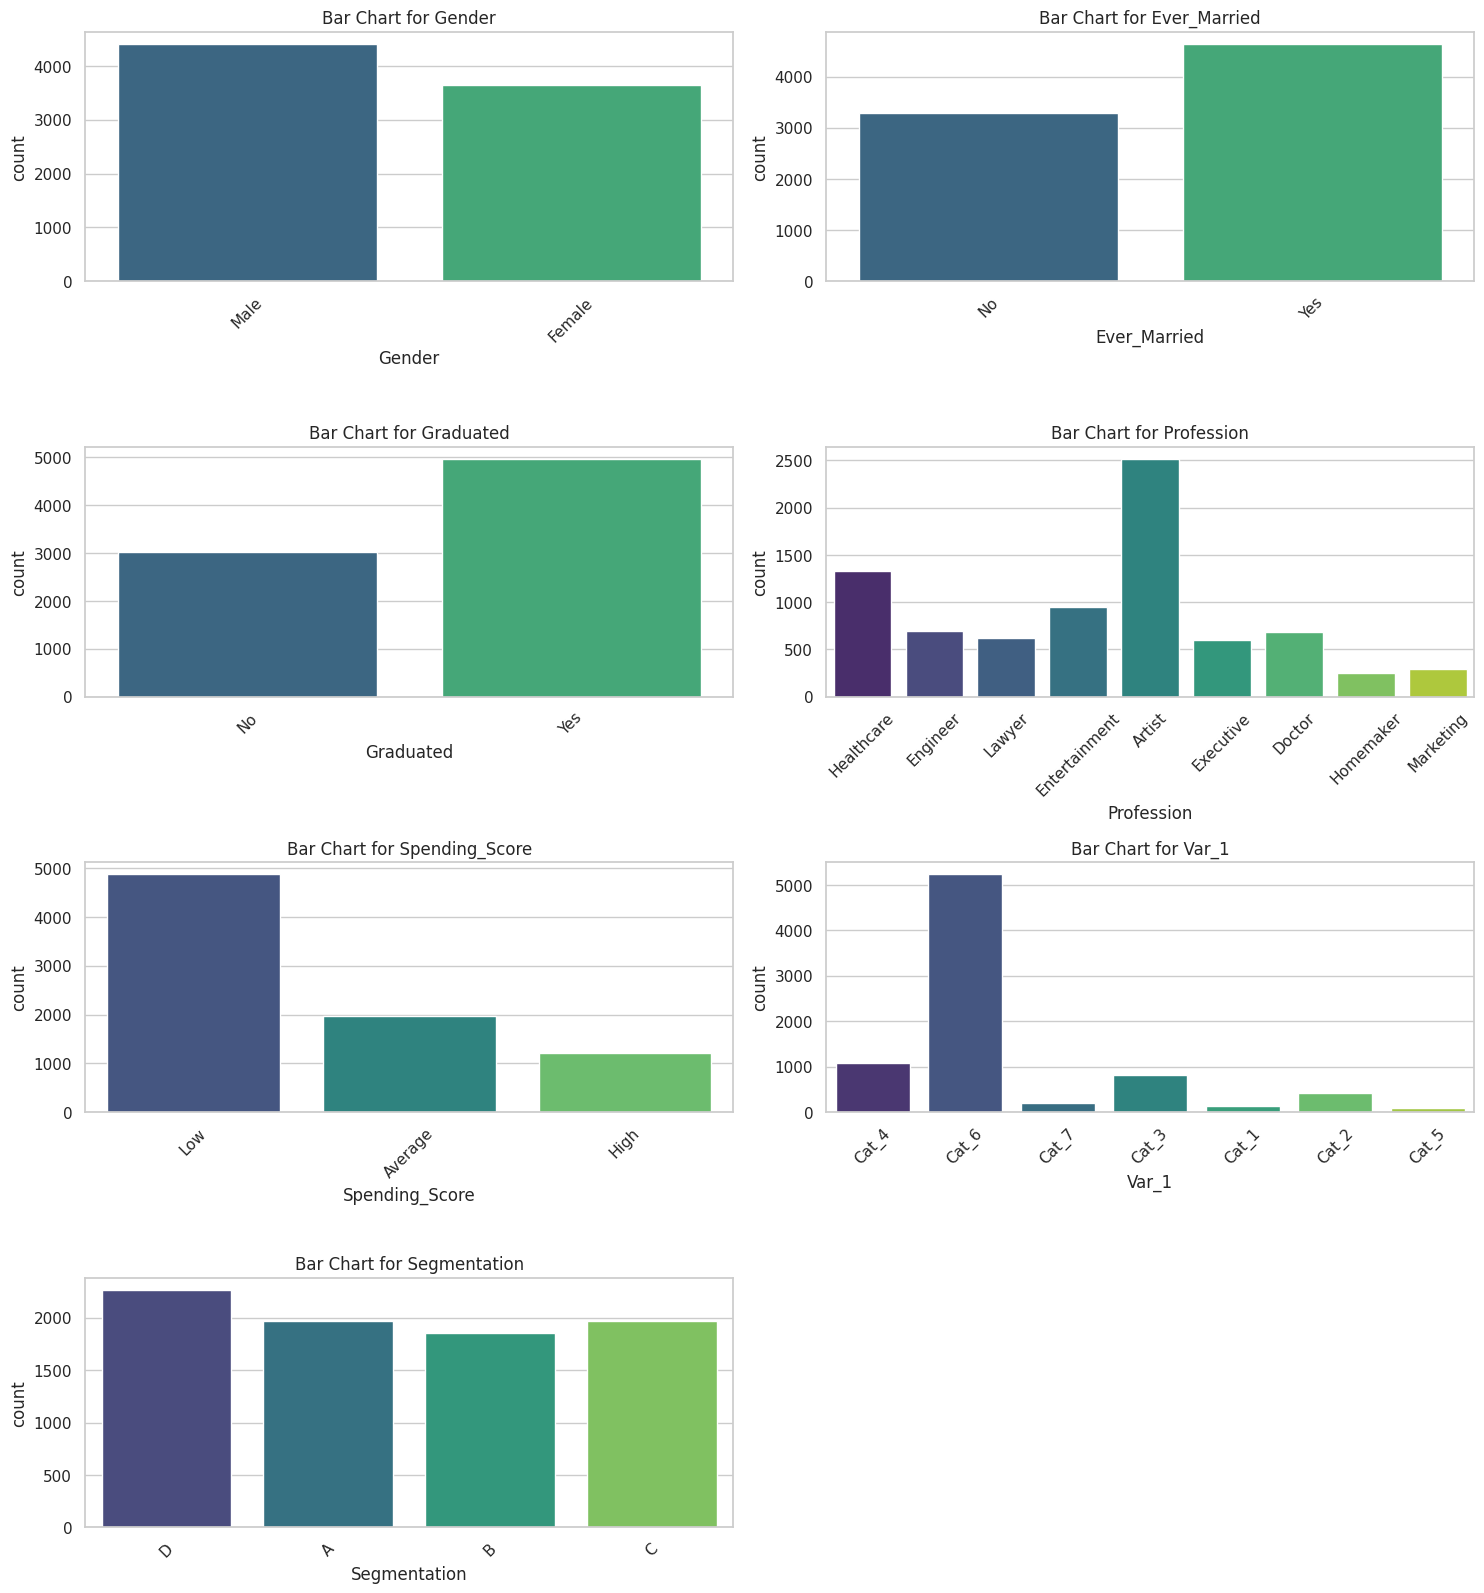

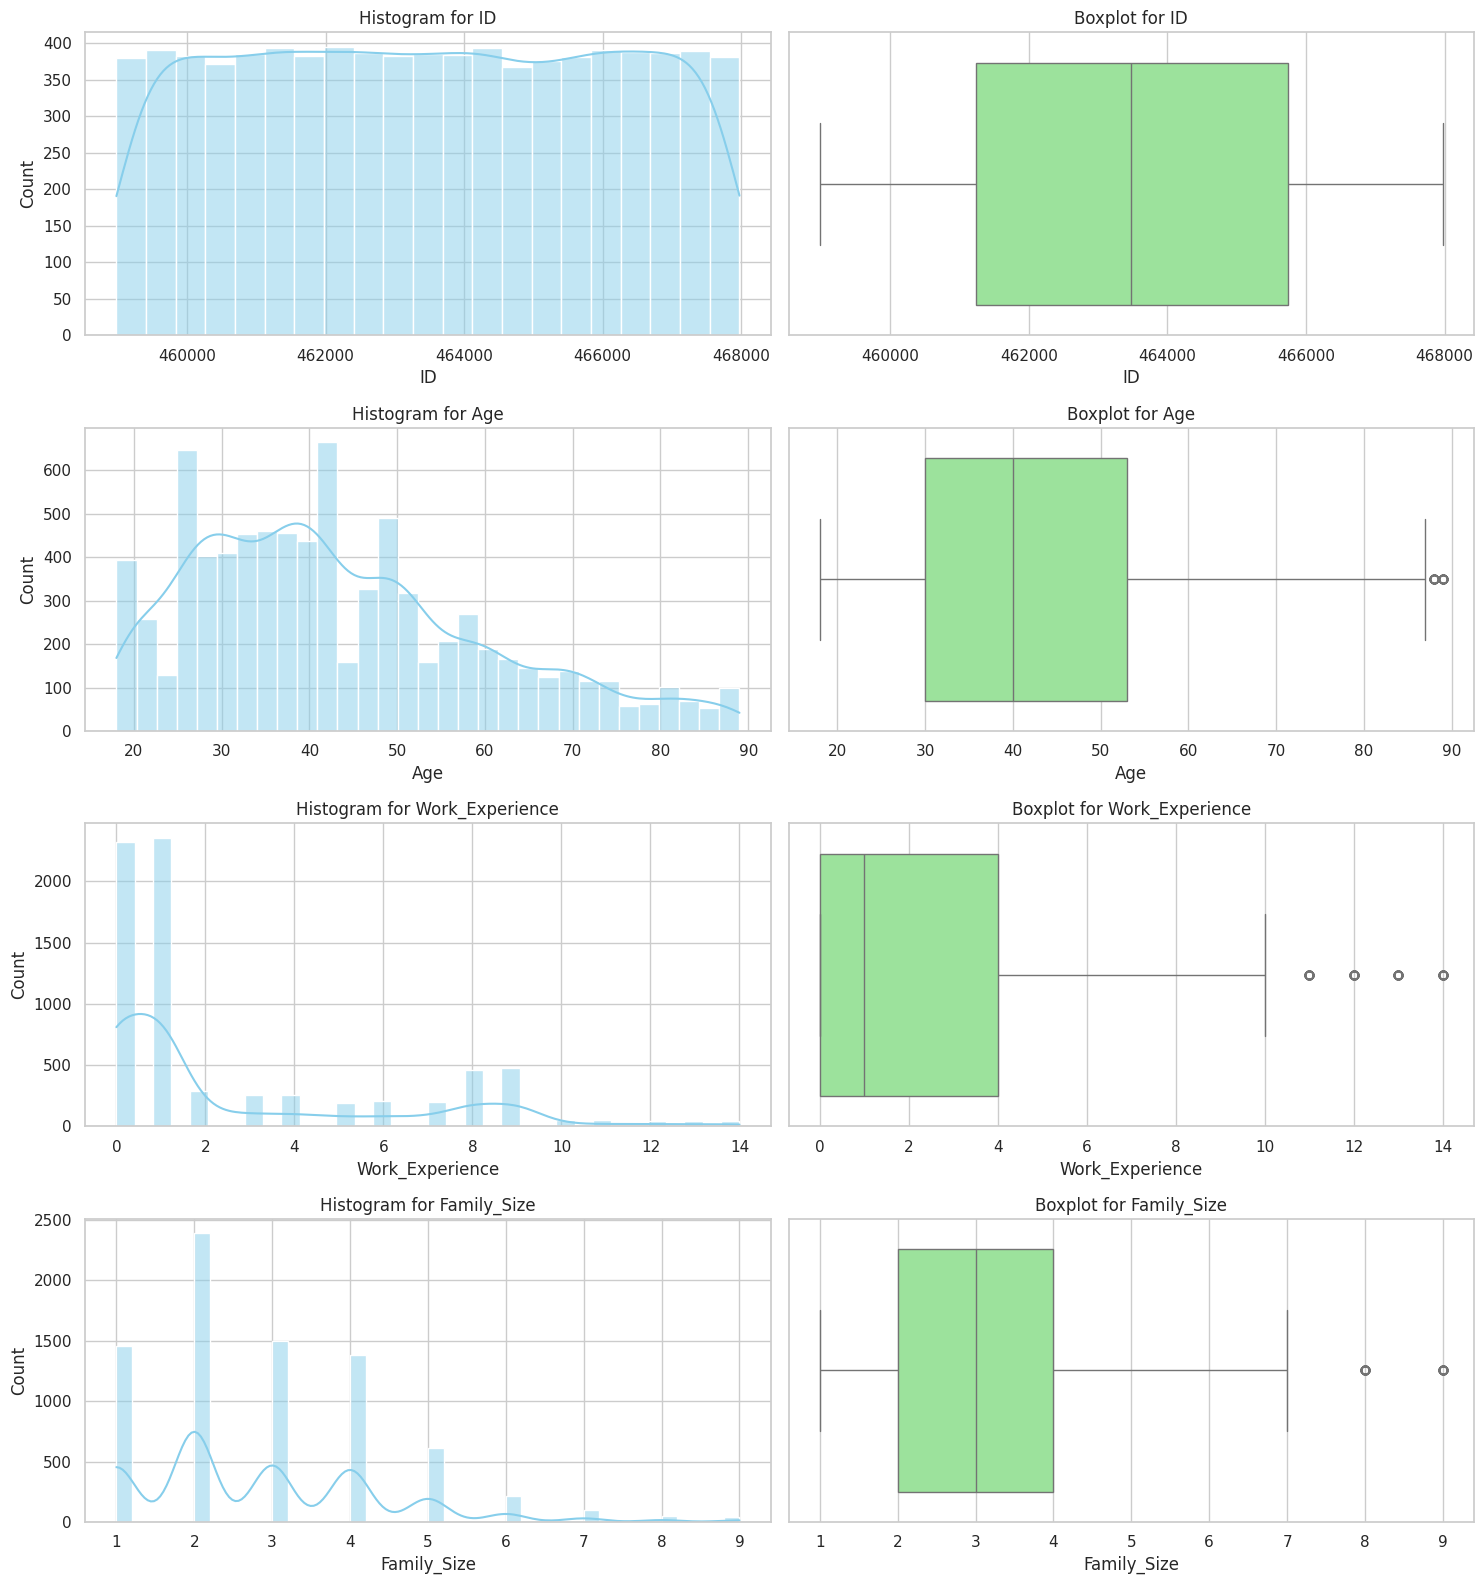

In [ ]:
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")

plt.figure(figsize=(15, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

plt.figure(figsize=(15, len(numerical_columns) * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2*i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram for {col}')

    plt.subplot(len(numerical_columns), 2, 2*i+2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809.0,Male,No,22.0,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643.0,Female,Yes,38.0,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315.0,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735.0,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669.0,Female,Yes,40.0,Yes,Entertainment,1.0,High,6.0,Cat_6,A


Plots for Segmentation: D


<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

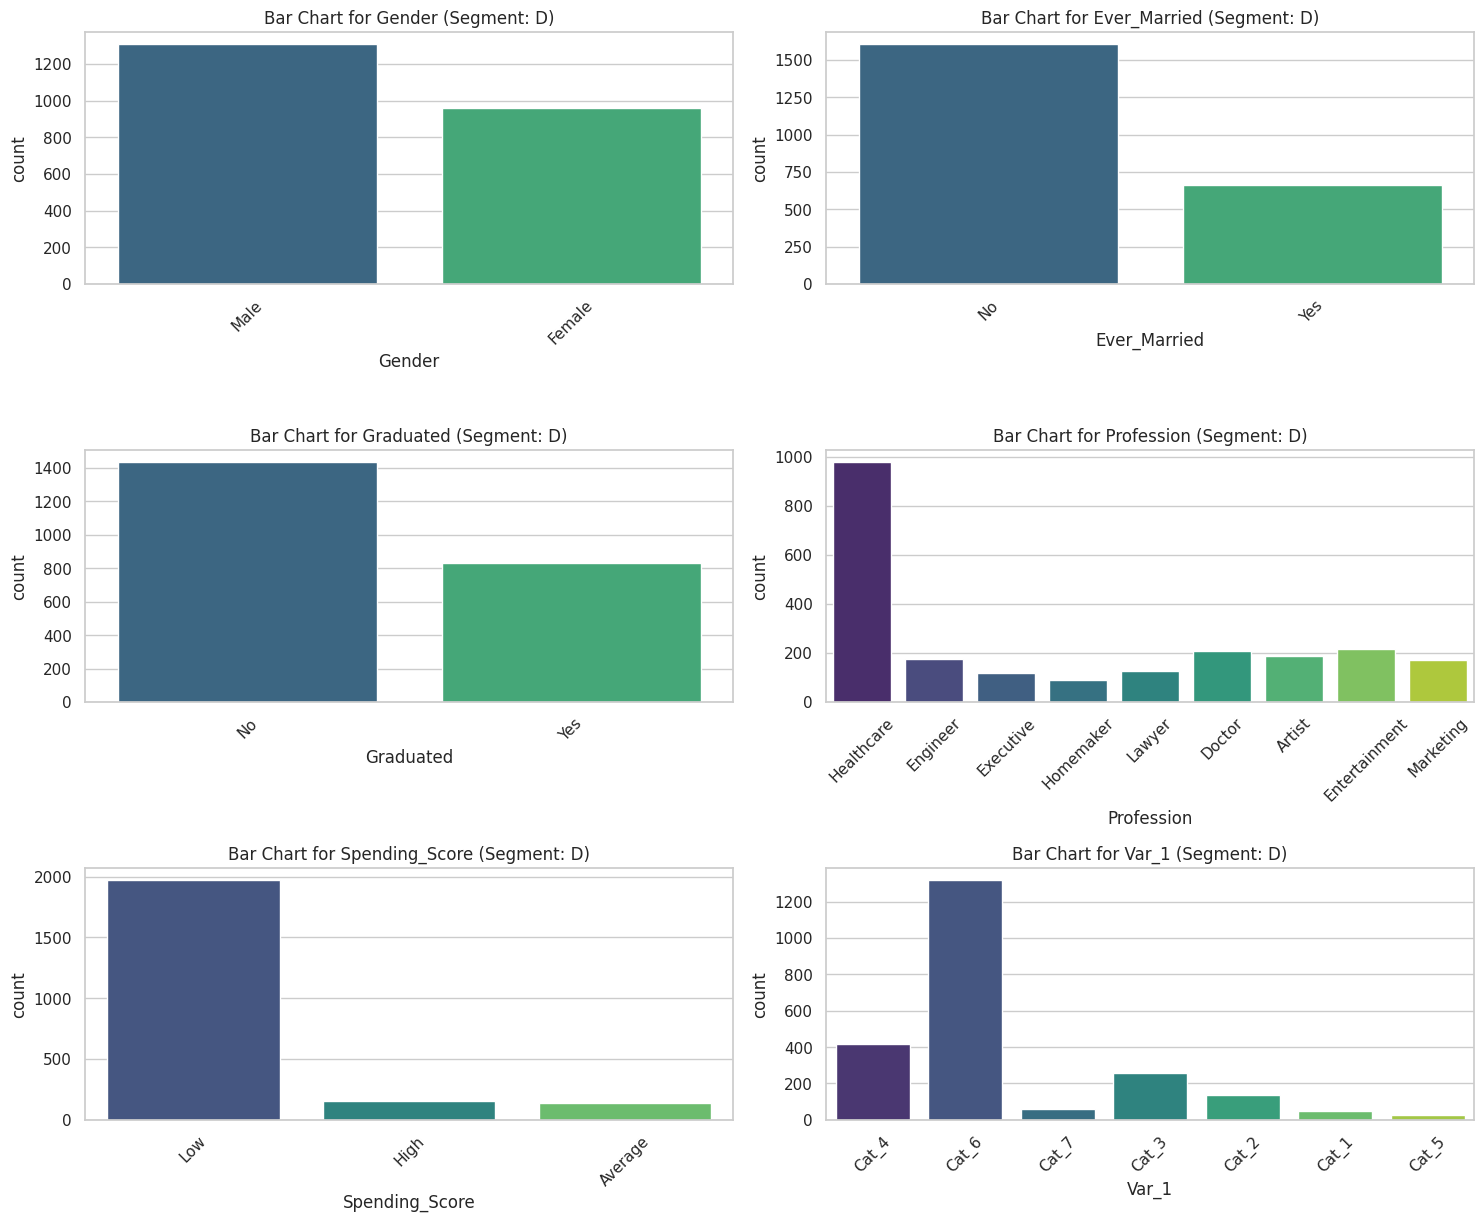

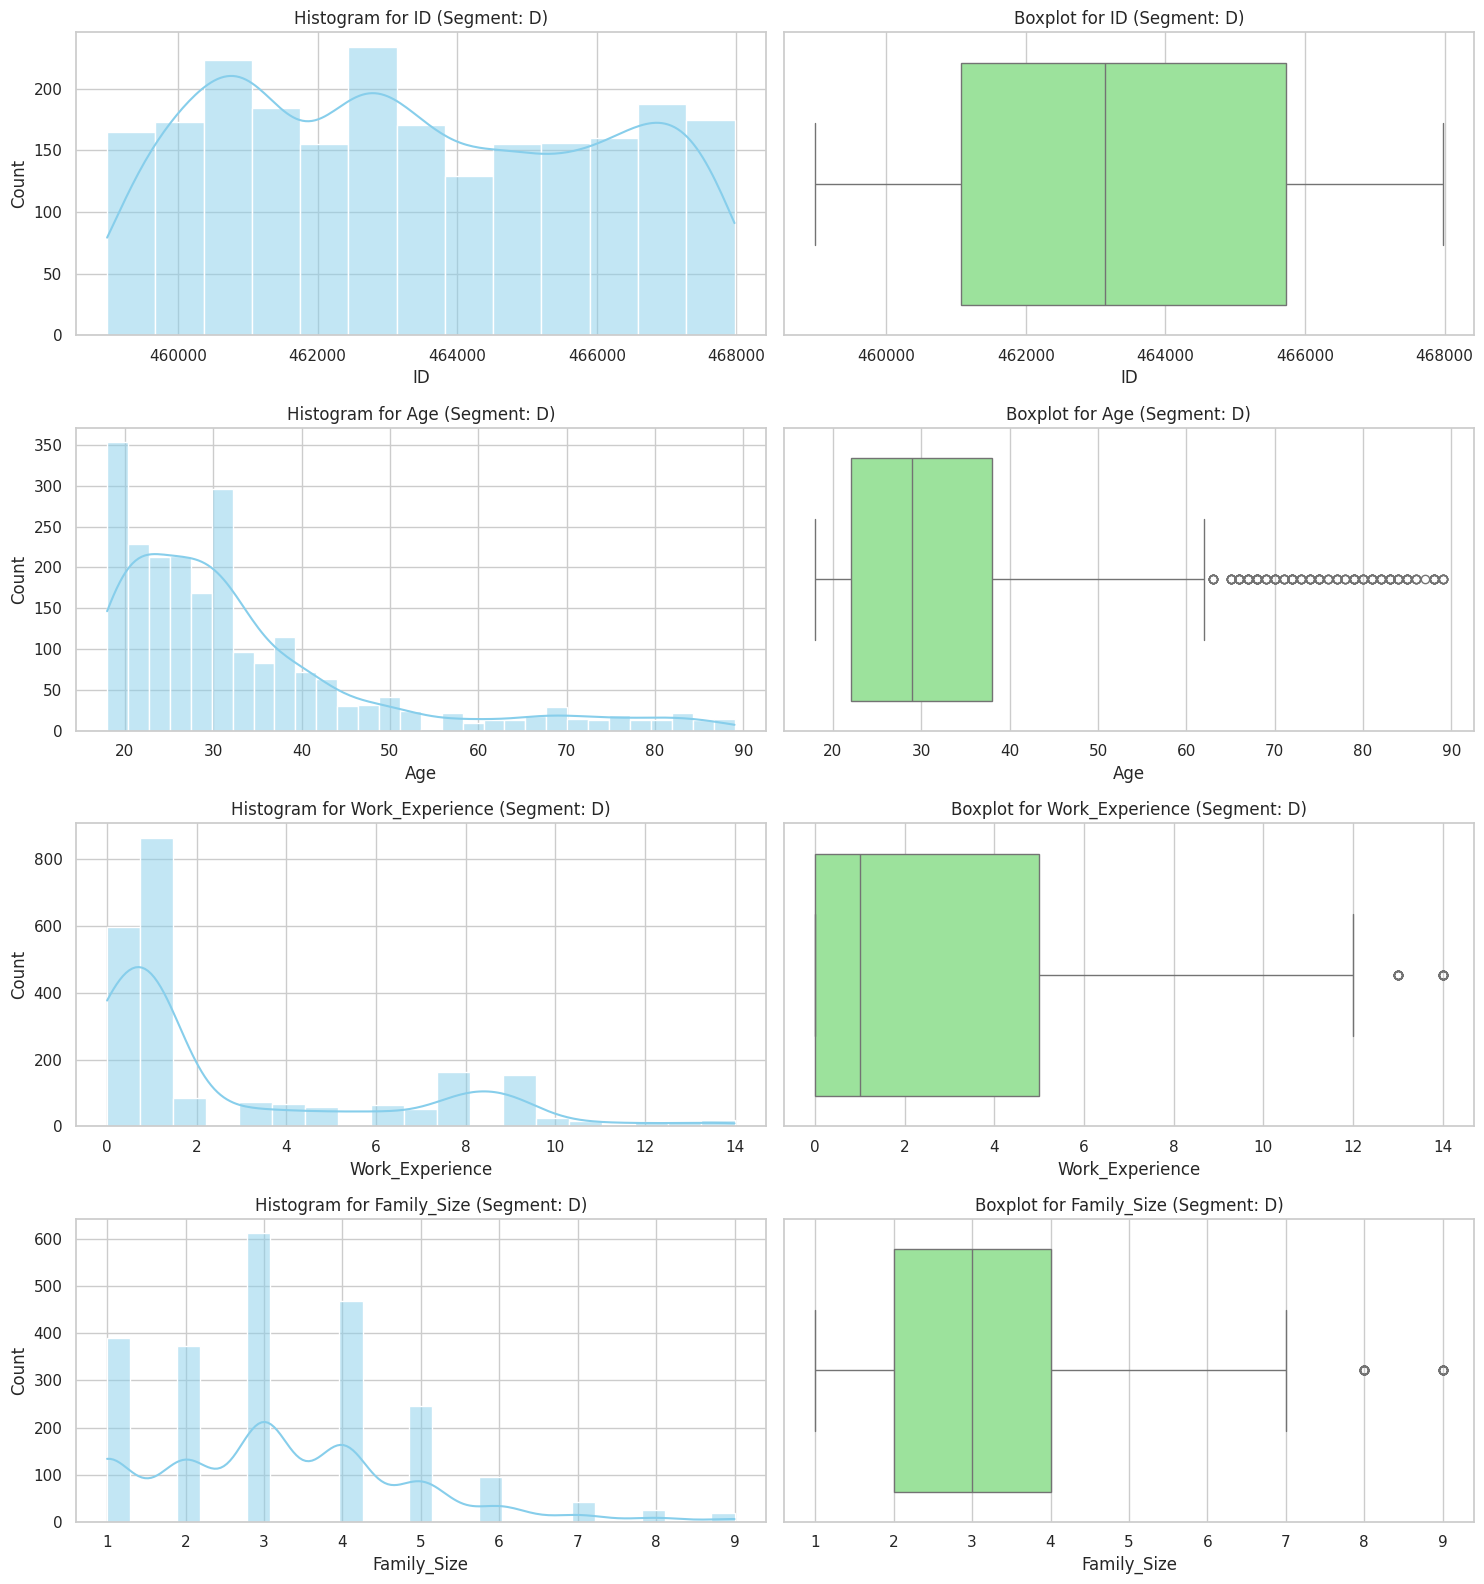

Plots for Segmentation: A


<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

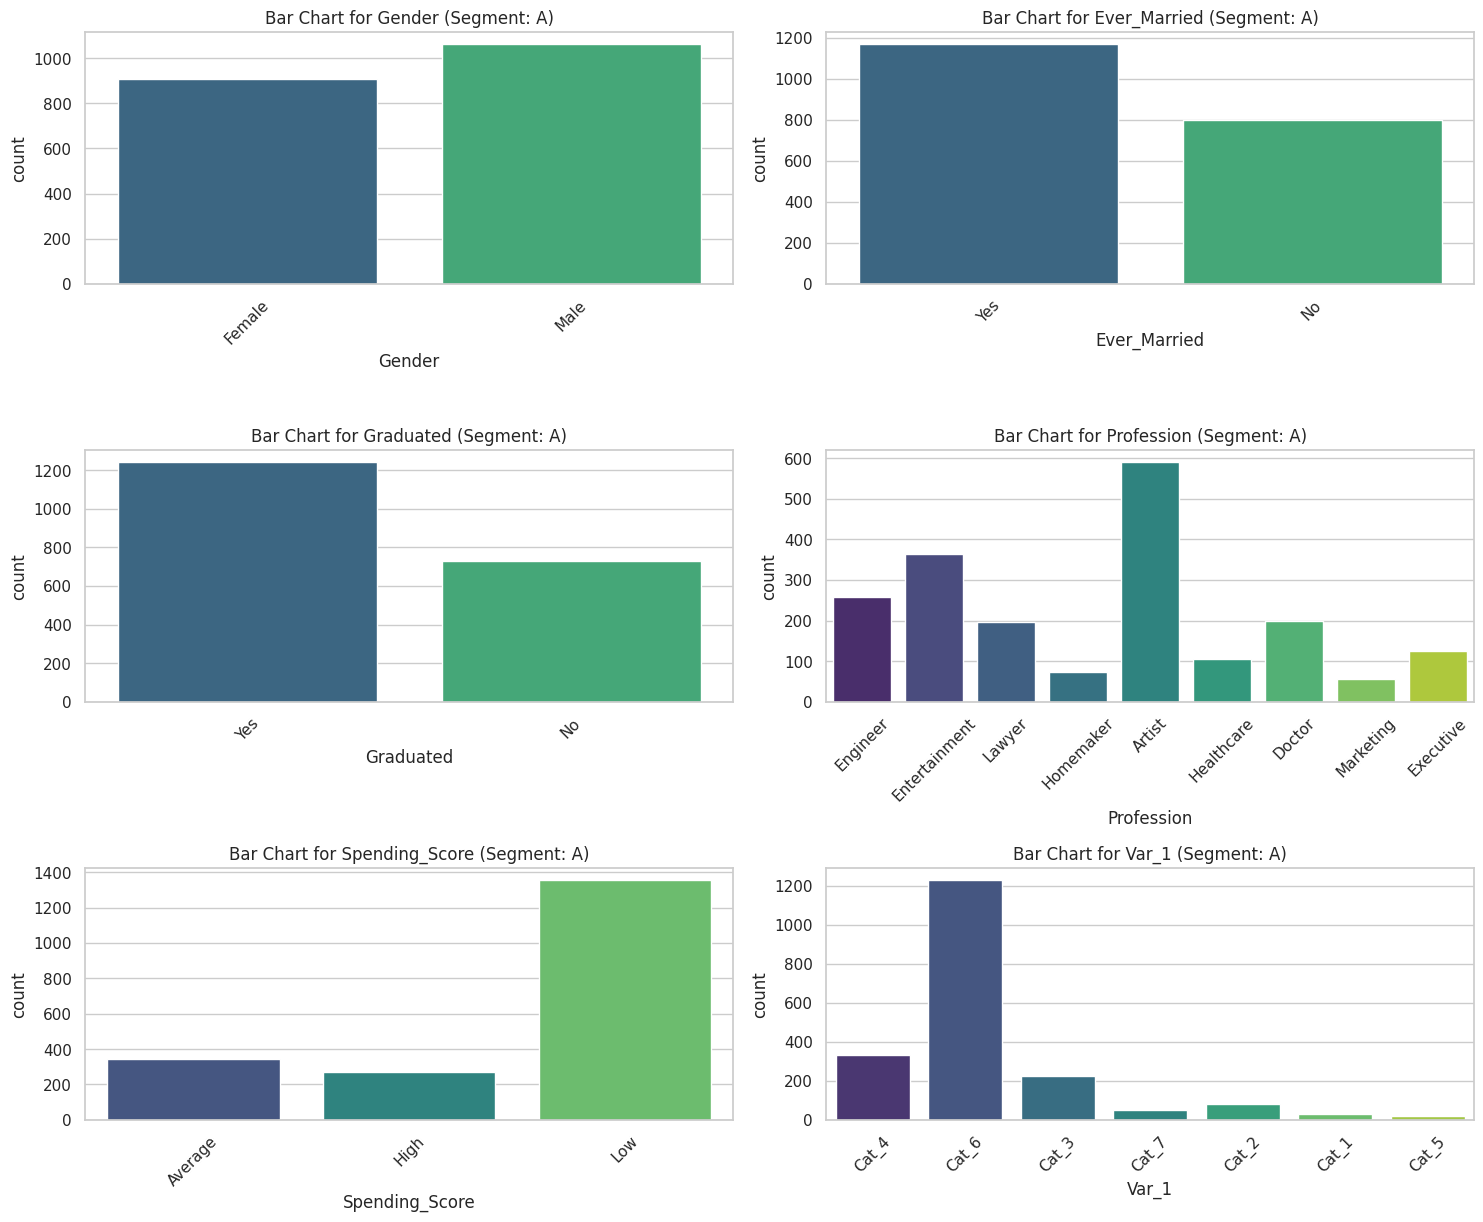

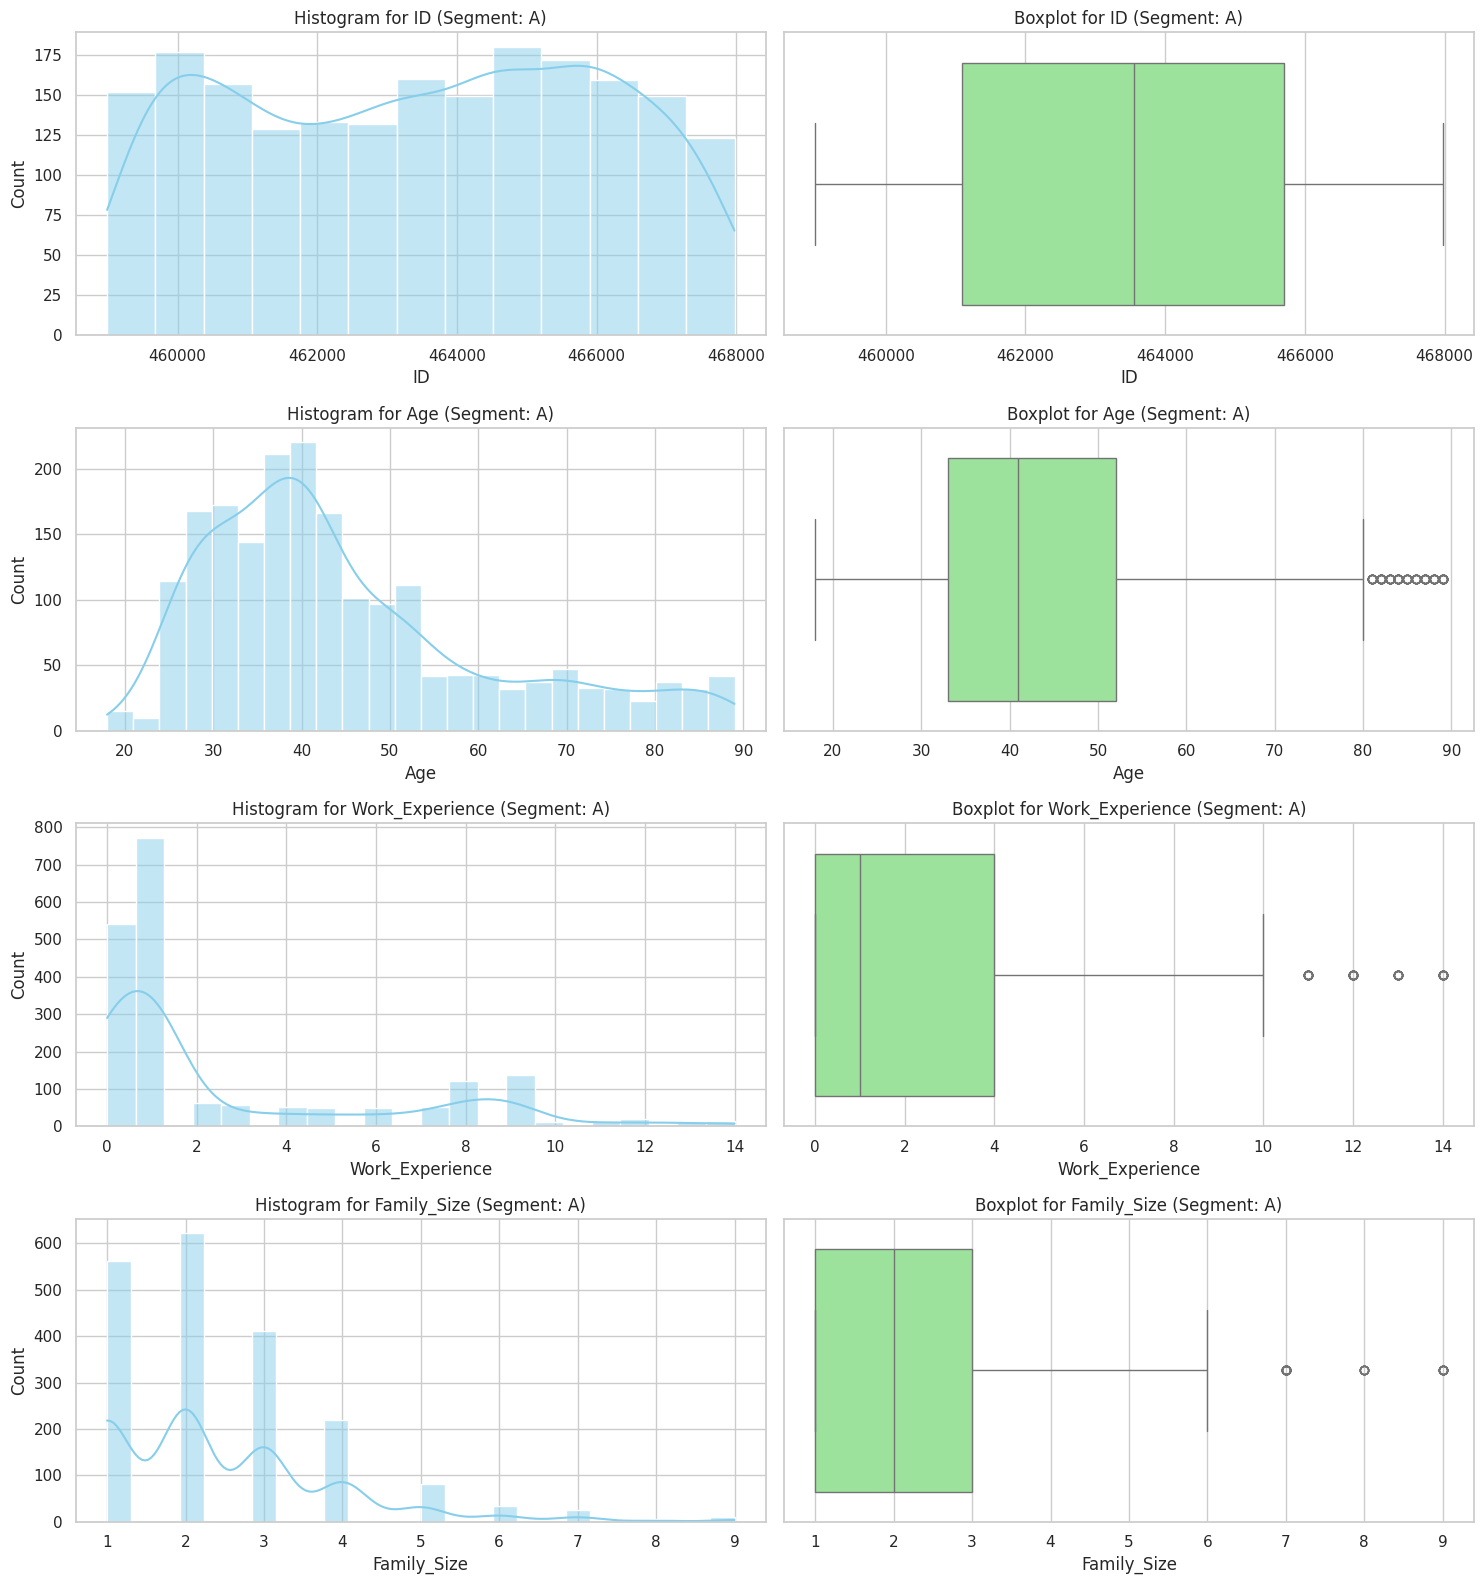

Plots for Segmentation: B


<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

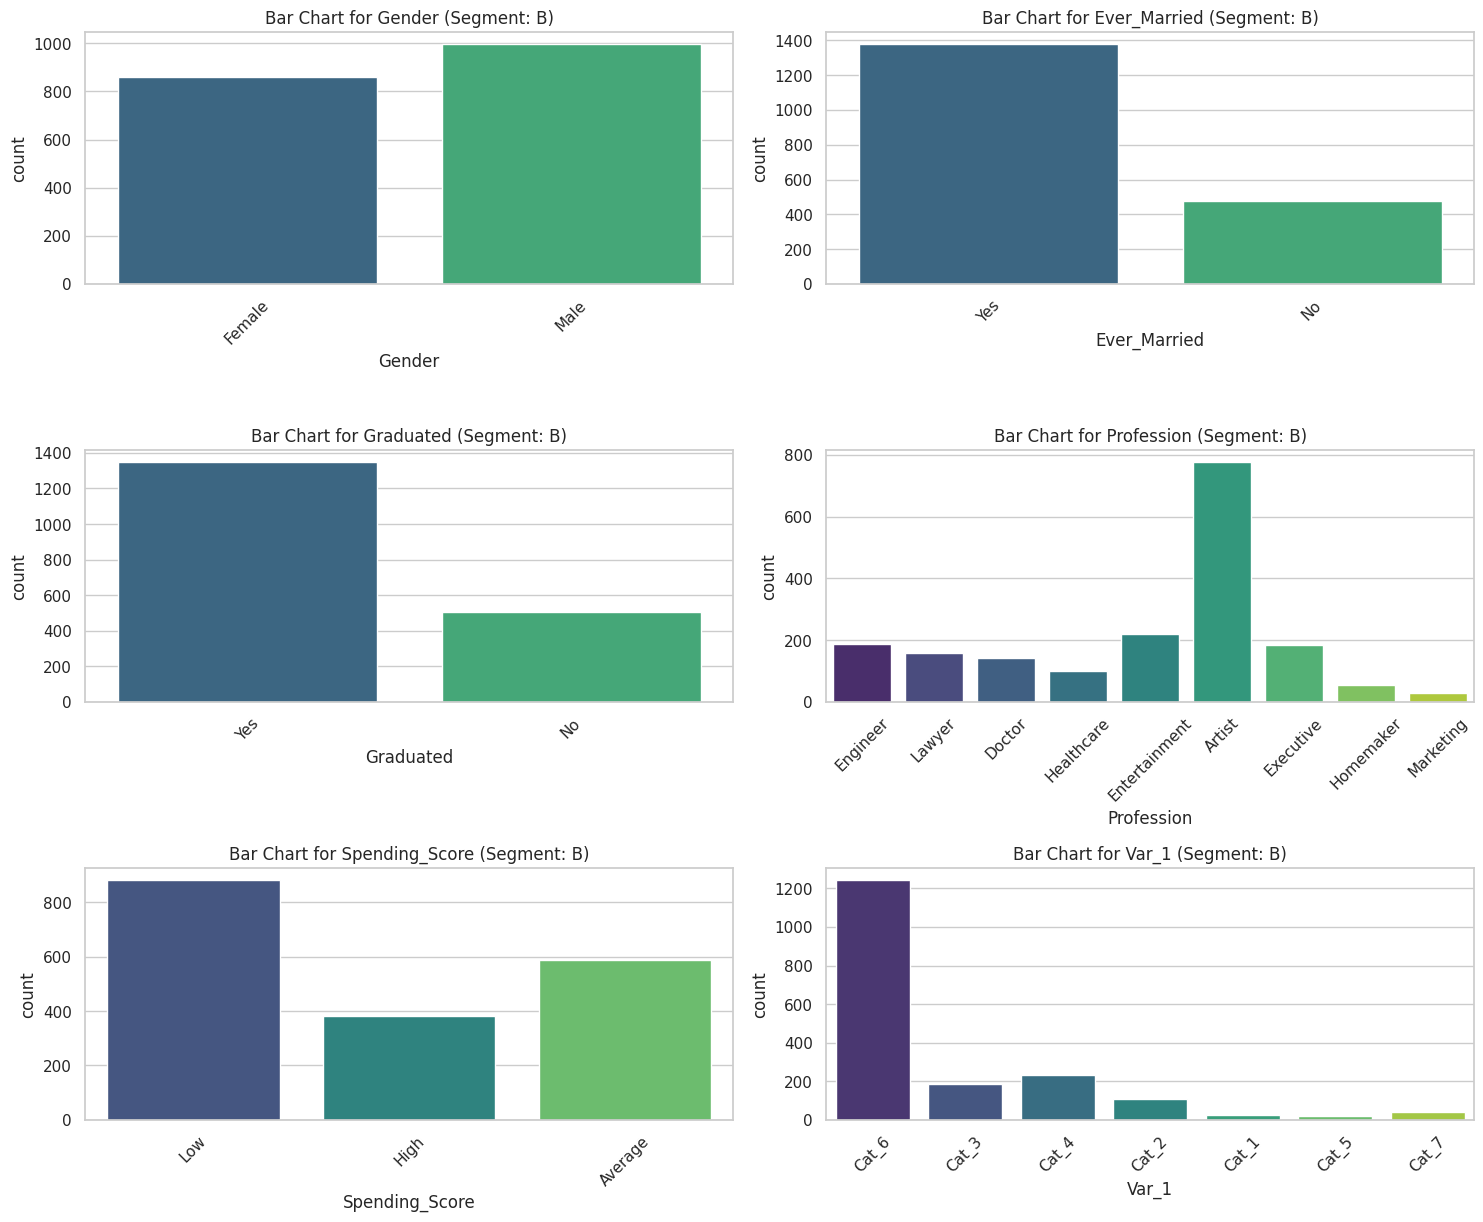

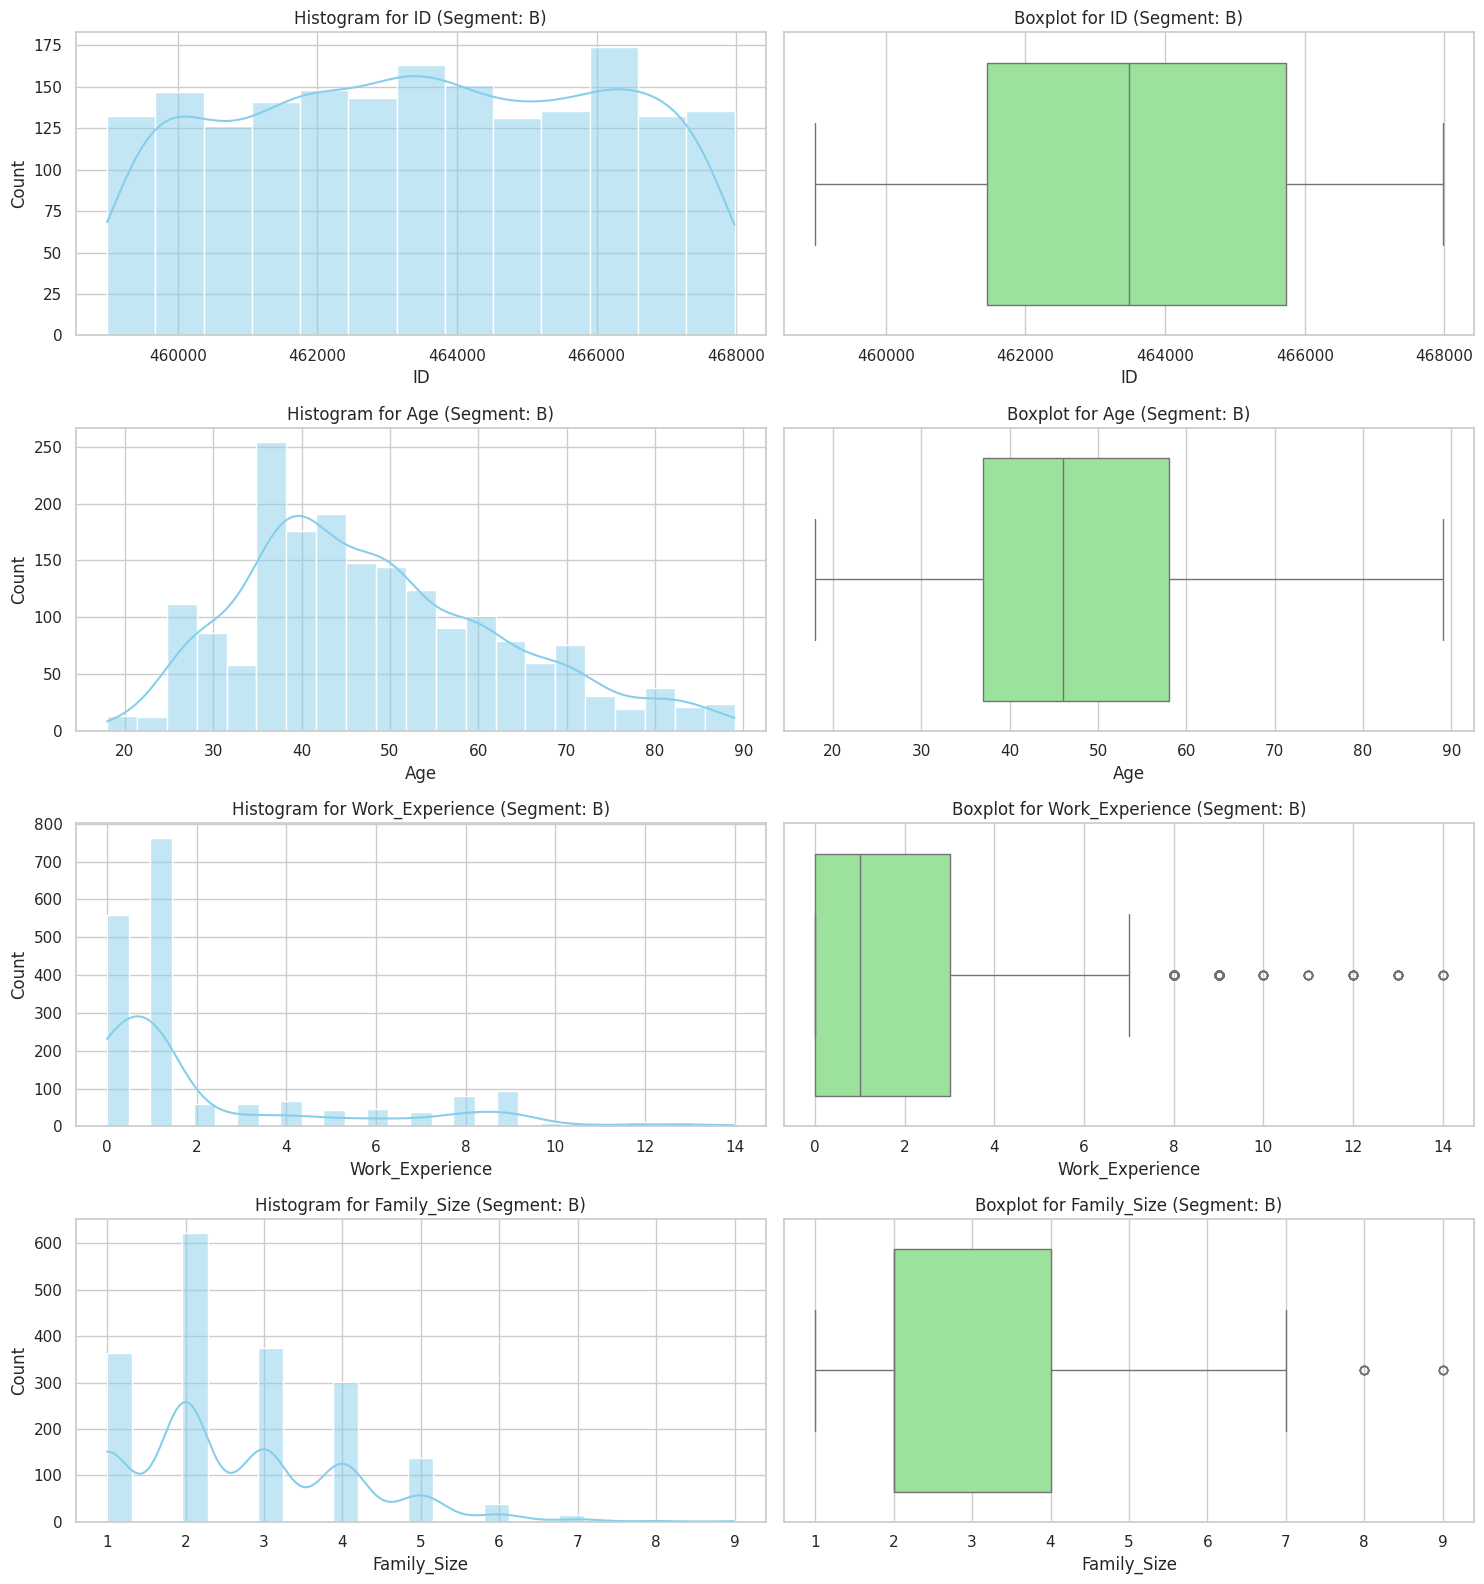

Plots for Segmentation: C


<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segment, x=col, palette='viridis')
<ipython-input-12-373e850d1c0f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

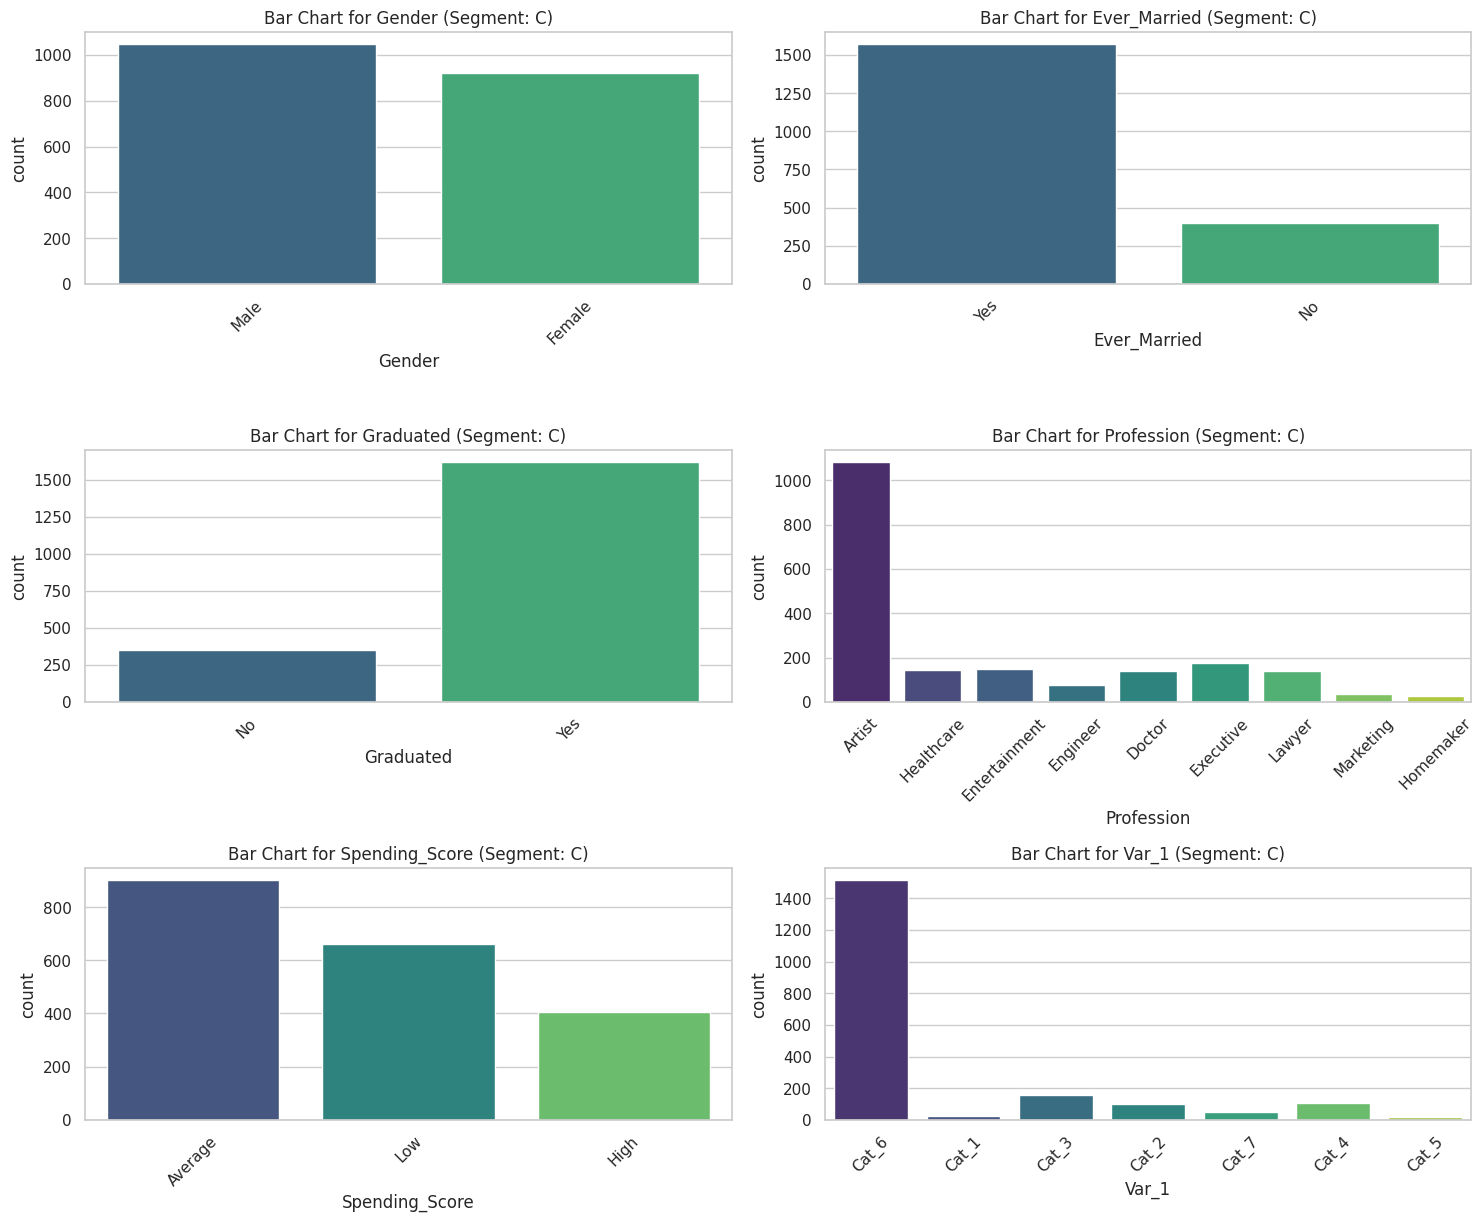

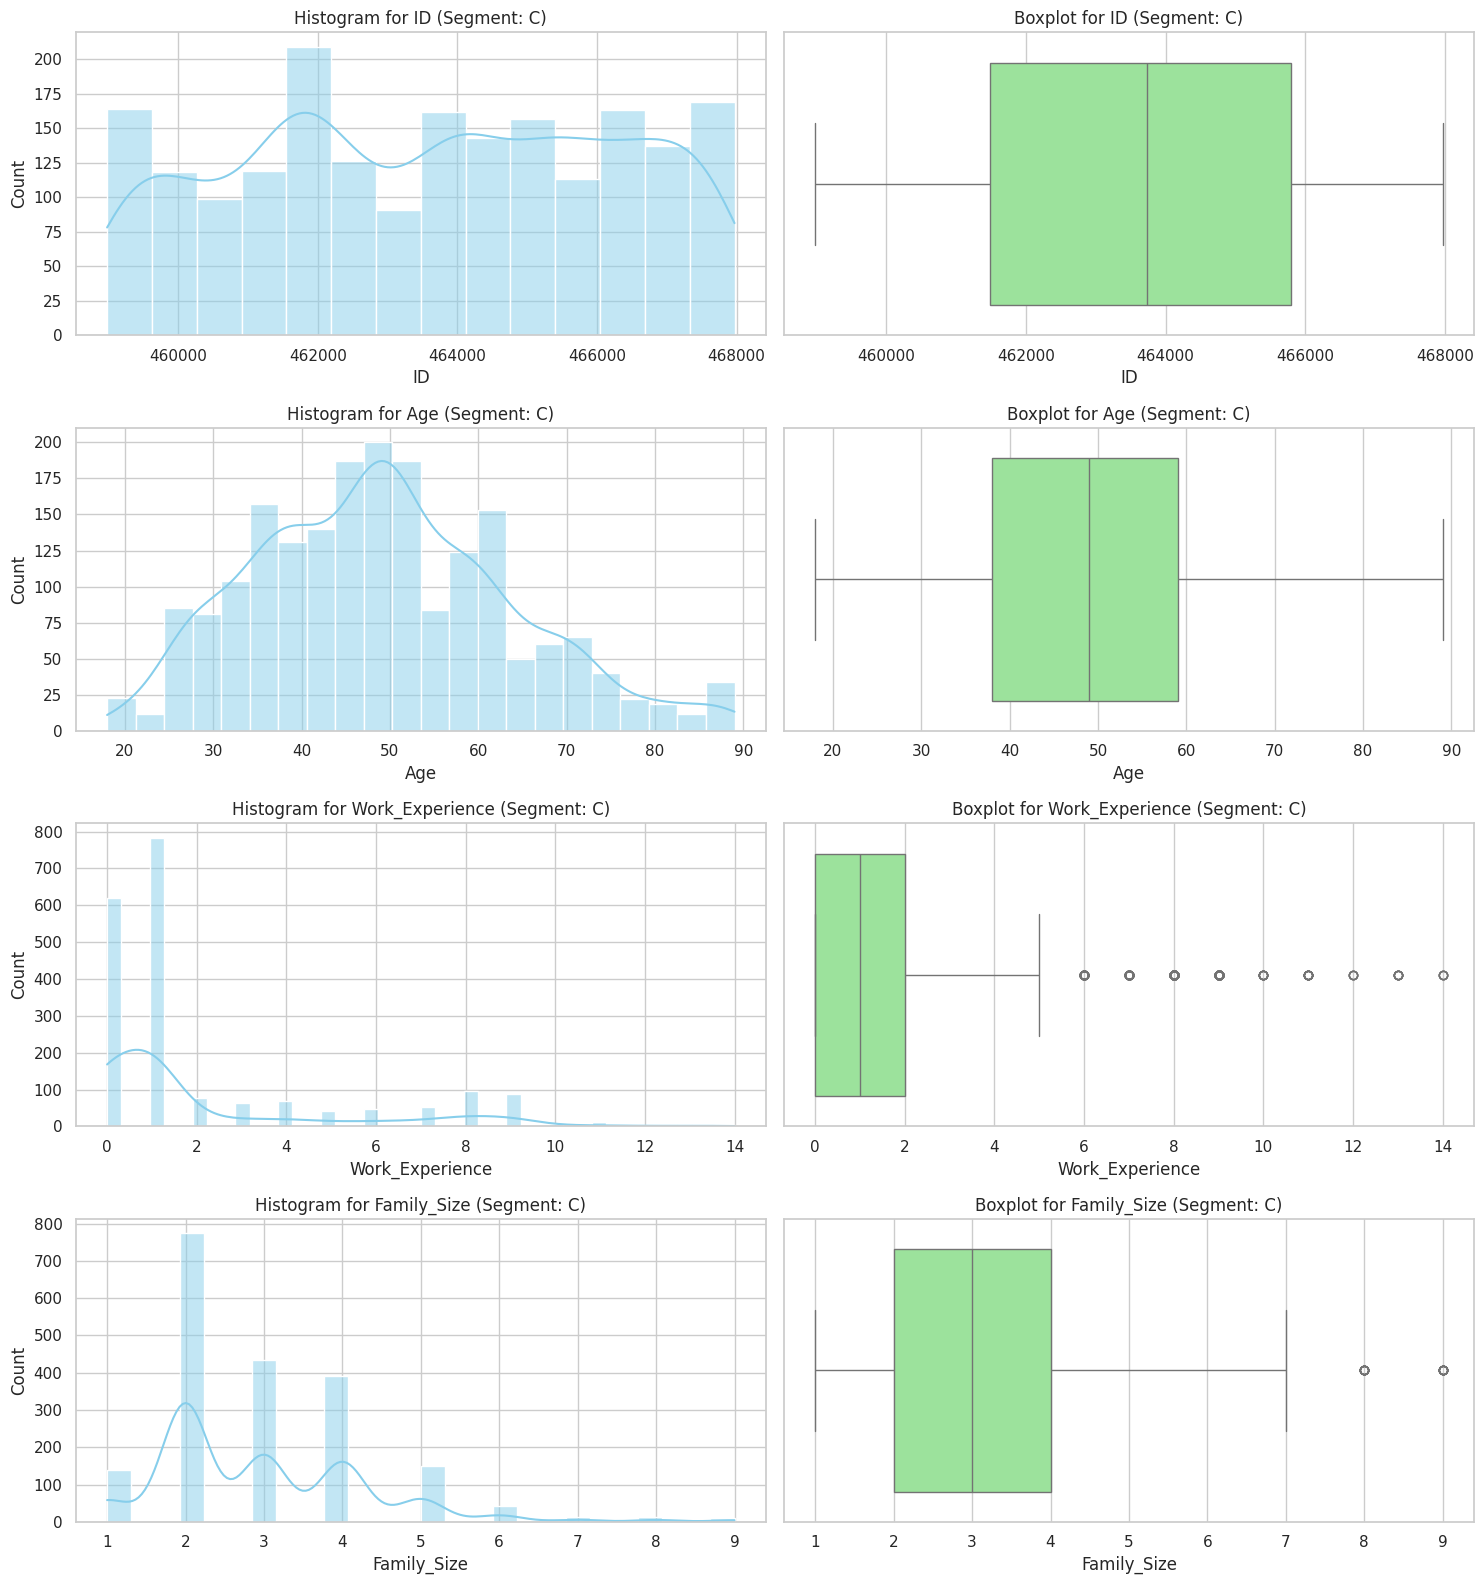

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_columns = categorical_columns.drop('Segmentation', errors='ignore')

sns.set(style="whitegrid")

segmentation_values = df['Segmentation'].unique()

for segment in segmentation_values:
    print(f"Plots for Segmentation: {segment}")


    df_segment = df[df['Segmentation'] == segment]


    plt.figure(figsize=(15, len(categorical_columns) * 4))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 2, i)
        sns.countplot(data=df_segment, x=col, palette='viridis')
        plt.title(f'Bar Chart for {col} (Segment: {segment})')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()


    plt.figure(figsize=(15, len(numerical_columns) * 4))
    for i, col in enumerate(numerical_columns):
        plt.subplot(len(numerical_columns), 2, 2*i+1)
        sns.histplot(df_segment[col], kde=True, color='skyblue')
        plt.title(f'Histogram for {col} (Segment: {segment})')

        plt.subplot(len(numerical_columns), 2, 2*i+2)
        sns.boxplot(x=df_segment[col], color='lightgreen')
        plt.title(f'Boxplot for {col} (Segment: {segment})')
        plt.tight_layout()

    plt.show()

In [ ]:
warnings.filterwarnings('ignore', category=FutureWarning, message=".*sparse.*renamed to `sparse_output`.*")

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('Segmentation', errors='ignore')

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(df[categorical_columns])

encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

df_encoded = df.drop(categorical_columns, axis=1).join(encoded_df)

df_encoded.head()


,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809.0,22.0,1.0,4.0,D,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643.0,38.0,1.0,3.0,A,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315.0,67.0,1.0,1.0,B,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735.0,67.0,0.0,2.0,B,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669.0,40.0,1.0,6.0,A,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


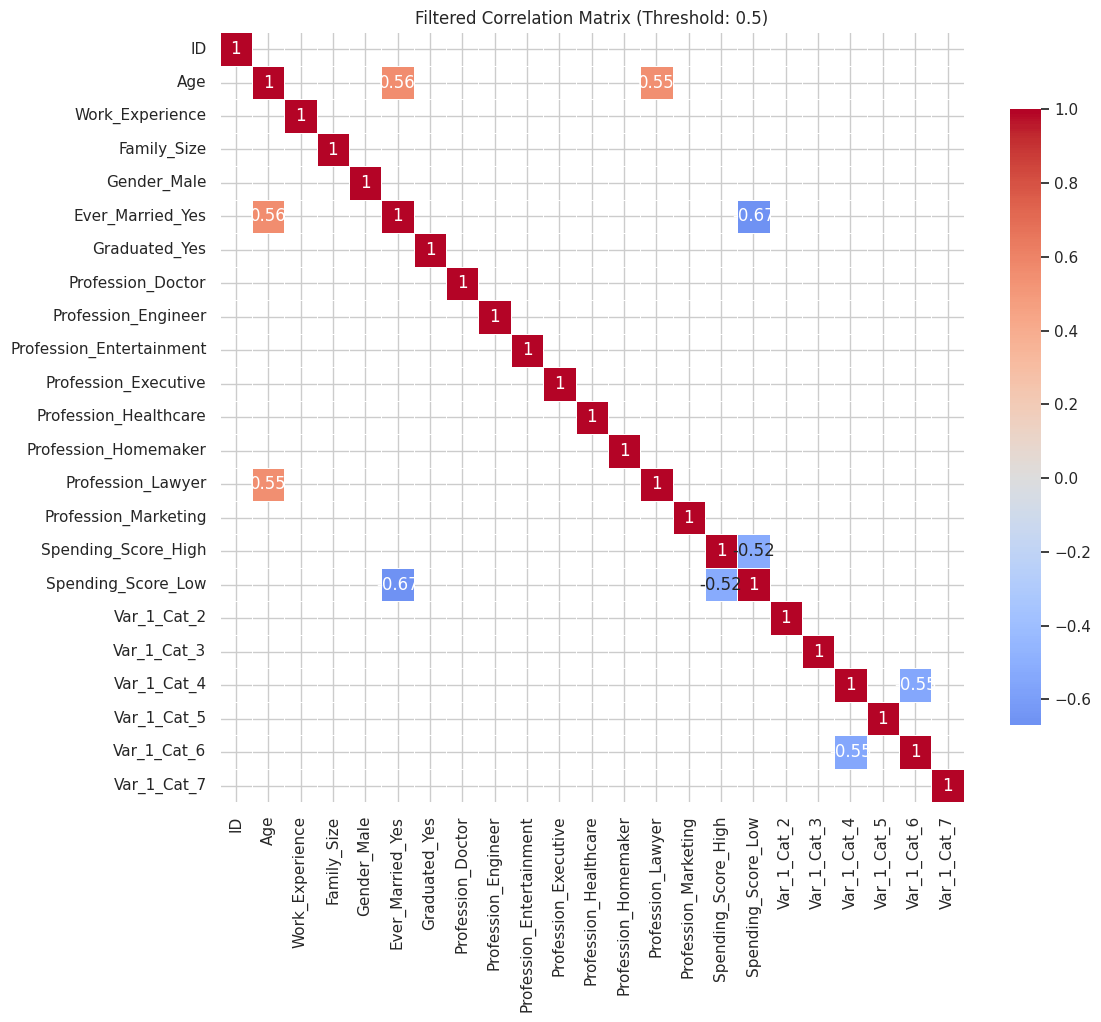

In [ ]:
df_encoded_no_target = df_encoded.drop(columns=['Segmentation'])

corr_matrix = df_encoded_no_target.corr()

threshold = 0.5

mask = np.abs(corr_matrix) >= threshold

filtered_corr_matrix = corr_matrix.where(mask)

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', center=0,
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='white')
plt.title('Filtered Correlation Matrix (Threshold: 0.5)')
plt.show()

In [ ]:
X = sm.add_constant(df_encoded_no_target)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data[vif_data["Variable"] != "const"]

print(vif_data)

                    Variable        VIF
1                         ID   1.012637
2                        Age   2.566126
3            Work_Experience   1.089836
4                Family_Size   1.277623
5                Gender_Male   1.172075
6           Ever_Married_Yes   2.432976
7              Graduated_Yes   1.274175
8          Profession_Doctor   1.229078
9        Profession_Engineer   1.289929
10  Profession_Entertainment   1.260322
11      Profession_Executive   1.527173
12     Profession_Healthcare   1.876534
13      Profession_Homemaker   1.132250
14         Profession_Lawyer   1.783179
15      Profession_Marketing   1.148292
16       Spending_Score_High   1.849901
17        Spending_Score_Low   2.414028
18               Var_1_Cat_2   3.981115
19               Var_1_Cat_3   6.467674
20               Var_1_Cat_4   8.020427
21               Var_1_Cat_5   1.626688
22               Var_1_Cat_6  14.073345
23               Var_1_Cat_7   2.470414


In [ ]:
columns_to_remove = [
    'Var_1_Cat_2',
    'Var_1_Cat_3',
    'Var_1_Cat_4',
    'Var_1_Cat_5',
    'Var_1_Cat_6',
    'Var_1_Cat_7'
]

df_cleaned = df_encoded_no_target.drop(columns=columns_to_remove, errors='ignore')

df_cleaned.head()


,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,462809.0,22.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,462643.0,38.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466315.0,67.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,461735.0,67.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,462669.0,40.0,1.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


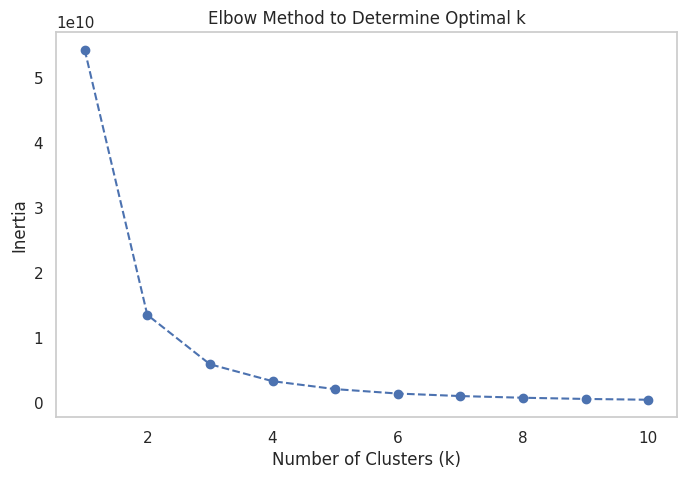

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


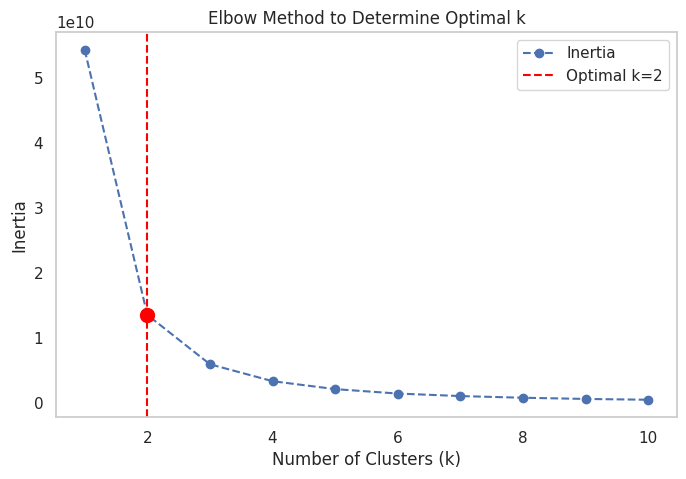

The optimal number of clusters (k) based on the Elbow Method is: 2


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Find the "elbow point" programmatically (first derivative approach)
inertia_diff = np.diff(inertia)
inertia_diff2 = np.diff(inertia_diff)  # Second derivative
optimal_k = np.argmax(inertia_diff2) + 2  # +2 because np.diff reduces dimensions

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.scatter(optimal_k, inertia[optimal_k - 1], color='red', s=100, zorder=5)  # Highlight the elbow
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

print(f"The optimal number of clusters (k) based on the Elbow Method is: {optimal_k}")

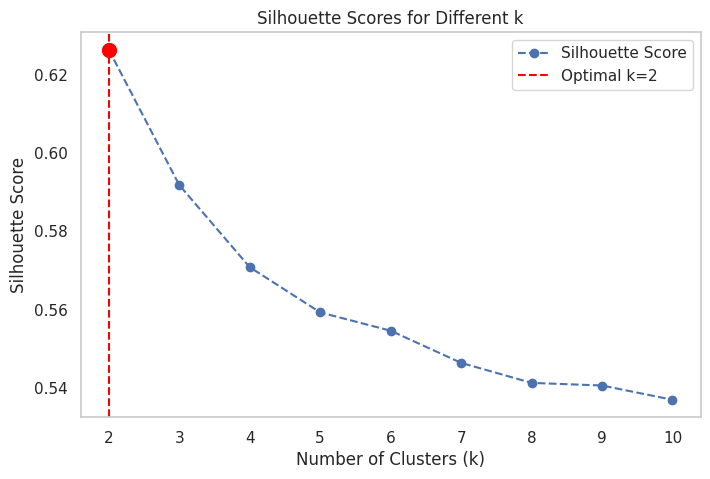

The optimal number of clusters (k) based on Silhouette Scores is: 2


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []

# Calculate silhouette scores for k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cleaned)
    score = silhouette_score(df_cleaned, labels)
    silhouette_scores.append(score)

# Find the optimal k (where silhouette score is maximum)
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 since range starts at 2

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.scatter(optimal_k, silhouette_scores[optimal_k - 2], color='red', s=100, zorder=5)  # Highlight the point
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

print(f"The optimal number of clusters (k) based on Silhouette Scores is: {optimal_k}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_cleaned)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(df_cleaned, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.6263


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(df_cleaned)

# Evaluate Agglomerative Clustering
agglo_silhouette = silhouette_score(df_cleaned, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.4f}")

Agglomerative Clustering Silhouette Score: 0.6246


In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_cleaned)

# Evaluate Gaussian Mixture Model
gmm_silhouette = silhouette_score(df_cleaned, gmm_labels)
print(f"Gaussian Mixture Silhouette Score: {gmm_silhouette:.4f}")

Gaussian Mixture Silhouette Score: 0.0067


In [ ]:
# Store results in a list
results = [
    ("K-Means", kmeans_silhouette),
    ("Agglomerative", agglo_silhouette),
    ("Gaussian Mixture", gmm_silhouette)
]

# Print and compare
for method, score in results:
    print(f"{method}: Silhouette Score = {score:.4f}")

K-Means: Silhouette Score = 0.6263
Agglomerative: Silhouette Score = 0.6246
Gaussian Mixture: Silhouette Score = 0.0067


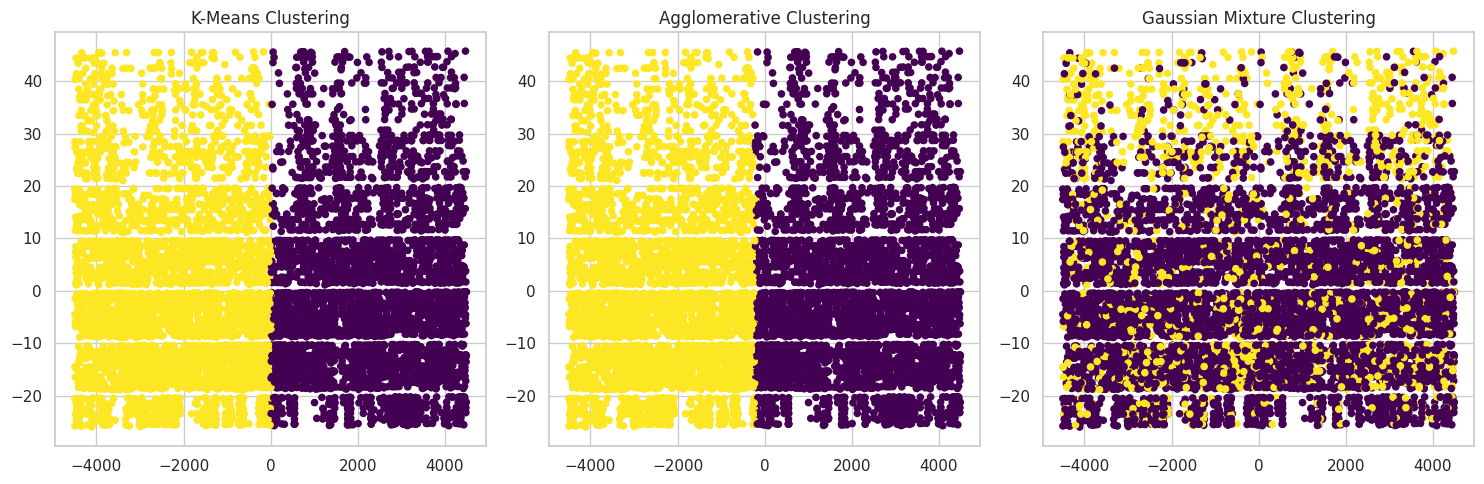

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned)

# Visualize all algorithms
plt.figure(figsize=(15, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('K-Means Clustering')

# Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agglo_labels, cmap='viridis', s=20)
plt.title('Agglomerative Clustering')

# Gaussian Mixture Model
plt.subplot(1, 3, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis', s=20)
plt.title('Gaussian Mixture Clustering')

plt.tight_layout()
plt.show()

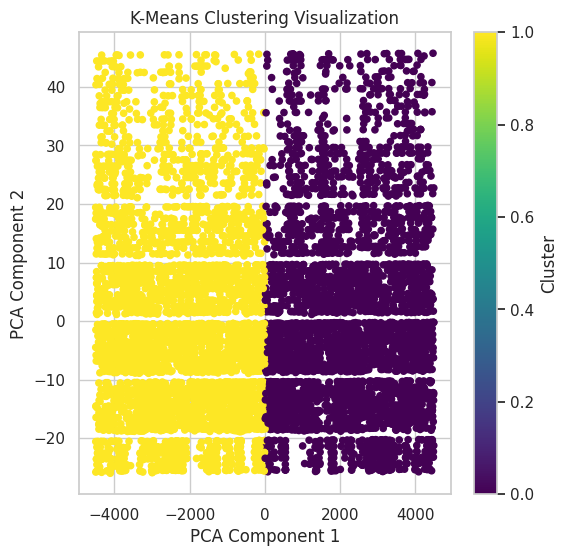

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pickle
from sklearn.cluster import KMeans

# Assuming `df_cleaned` is the preprocessed dataframe
X = df_cleaned  # Ensure this is the same data you used for training

# Fit the KMeans model (example with k=2, change it according to your needs)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Save the model to a pickle file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("KMeans model saved successfully!")

KMeans model saved successfully!


In [ ]:
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

In [ ]:
import pandas as pd
import numpy as np
import pickle

# Load the model (make sure the model file is present in the directory)
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

# Assuming the columns you want the user to input are part of df_cleaned
# List of feature names (remove the target/label columns if any)
feature_columns = df_cleaned.columns.tolist()

# Prompt user to input the required features
user_input = {}
for col in feature_columns:
    value = input(f"Enter the value for {col}: ")

    # Convert input to appropriate type
    if df_cleaned[col].dtype == 'float64' or df_cleaned[col].dtype == 'int64':
        value = float(value)
    user_input[col] = value

# Convert the user input to a DataFrame (same format as the training data)
input_data = pd.DataFrame([user_input])

# Preprocess the data like you did for training (imputing, encoding, etc.)
# Assuming you had the imputation and encoding steps earlier
# Apply the same transformations as done during training (this is an example)

# Example preprocessing steps (adjust as necessary)
# input_data = preprocess(input_data)  # Replace this with your preprocessing steps

# Predict using the K-Means model
predicted_cluster = kmeans.predict(input_data)

print(f"The predicted cluster for your input is: {predicted_cluster[0]}")


Enter the value for ID: 345
Enter the value for Age: 45
Enter the value for Work_Experience: 6
Enter the value for Family_Size: 3
Enter the value for Gender_Male: 0
Enter the value for Ever_Married_Yes: 1
Enter the value for Graduated_Yes: 1
Enter the value for Profession_Doctor: 0
Enter the value for Profession_Engineer: 1
Enter the value for Profession_Entertainment: 1
Enter the value for Profession_Executive: 1
Enter the value for Profession_Healthcare: 1
Enter the value for Profession_Homemaker: 0
Enter the value for Profession_Lawyer: 0
Enter the value for Profession_Marketing: 0
Enter the value for Spending_Score_High: 1
Enter the value for Spending_Score_Low: 0
The predicted cluster for your input is: 1
